In [1091]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import re
import folium
sns.set_theme(context='poster', font='serif', font_scale=0.8)

In [1092]:
coffee_shops = pd.read_csv('data/details_data_raw.csv', index_col=0)

#### Data Exploration

In [1093]:
coffee_shops.head()

formattedAddress  \
0  C. 27 117, San Lorenzo, Umán, 97390 Umán, Yuc....   
1  C. 27 131, San Lorenzo, Umán, 97390 Umán, Yuc....   
2              C. 20, Umán, 97390 Umán, Yuc., Mexico   
3  Campeche-Mérida 11592, 97392 Mérida, Yuc., Mexico   
4  C. 40a 823c, Piedra de Agua, 97392 Umán, Yuc.,...   

                                            location  rating businessStatus  \
0  {'latitude': 20.894740499999997, 'longitude': ...     5.0    OPERATIONAL   
1  {'latitude': 20.8945503, 'longitude': -89.732288}     3.0    OPERATIONAL   
2  {'latitude': 20.8915676, 'longitude': -89.7302...     5.0    OPERATIONAL   
3  {'latitude': 20.8941657, 'longitude': -89.6934...     NaN    OPERATIONAL   
4  {'latitude': 20.9021989, 'longitude': -89.6958...     NaN    OPERATIONAL   

   userRatingCount                                        displayName  \
0              2.0  {'text': 'Frappe shop suc san lorenzo', 'langu...   
1              5.0  {'text': 'Panucheria Doña Yolí', 'languageCode...   
2              1.0  {'text': 'Taquería mi Angel', 'languageCode': ...   
3              NaN  {'text': 'Barra andatti Gourmet Santa Cruz', '...   
4              NaN        {'text': 'Antojeria', 'languageCode': 'es'}   

                             primaryTypeDisplayName priceRange websiteUri  
0         {'text': 'Cafe', 'languageCode': 'en-US'}        NaN        NaN  
1  {'text': 'Coffee Shop', 'languageCode': 'en-US'}        NaN        NaN  
2  {'text': 'Coffee Shop', 'languageCode': 'en-US'}        NaN        NaN  
3  {'text': 'Coffee Shop', 'languageCode': 'en-US'}        NaN        NaN  
4  {'text': 'Coffee Shop', 'languageCode': 'en-US'}        NaN        NaN

In [1094]:
coffee_shops.tail()

formattedAddress  \
743  97302 Calle 100-2 #140h Fraccionamiento las am...   
744  C. 49-B 926, entre 112 y 108 A, Fraccionamient...   
745  C. 100-1 137, Fraccionamiento Las Américas 2, ...   
746  Carr. Mérida - Progreso, 97302 Xcanatún, Yuc.,...   
747       C. 21 entre 4, 97302 Chablekal, Yuc., Mexico   

                                              location  rating businessStatus  \
743  {'latitude': 21.080935099999998, 'longitude': ...     NaN    OPERATIONAL   
744  {'latitude': 21.0818943, 'longitude': -89.6616...     5.0    OPERATIONAL   
745  {'latitude': 21.081186499999998, 'longitude': ...     5.0    OPERATIONAL   
746  {'latitude': 21.0814901, 'longitude': -89.6352...     4.3    OPERATIONAL   
747  {'latitude': 21.091645099999997, 'longitude': ...     5.0    OPERATIONAL   

     userRatingCount                                        displayName  \
743              NaN    {'text': 'Espacio 11:11', 'languageCode': 'es'}   
744             10.0          {'text': 'Frapplo', 'languageCode': 'es'}   
745              2.0  {'text': 'Mejorar el futuro!', 'languageCode':...   
746            183.0  {'text': 'Starbucks Carretera Progreso', 'lang...   
747              1.0    {'text': 'DRAGÓN SUSHI🐉', 'languageCode': 'es'}   

                               primaryTypeDisplayName  \
743         {'text': 'Cafe', 'languageCode': 'en-US'}   
744  {'text': 'Coffee Shop', 'languageCode': 'en-US'}   
745         {'text': 'Cafe', 'languageCode': 'en-US'}   
746  {'text': 'Coffee Shop', 'languageCode': 'en-US'}   
747  {'text': 'Coffee Shop', 'languageCode': 'en-US'}   

                                            priceRange  \
743                                                NaN   
744  {'startPrice': {'currencyCode': 'MXN', 'units'...   
745                                                NaN   
746  {'startPrice': {'currencyCode': 'MXN', 'units'...   
747                                                NaN   

                              websiteUri  
743                                  NaN  
744  https://www.instagram.com/frapplo_/  
745                                  NaN  
746                                  NaN  
747                                  NaN

In [1095]:
coffee_shops.shape

(748, 9)

In [1096]:
coffee_shops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 747
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   formattedAddress        748 non-null    object 
 1   location                748 non-null    object 
 2   rating                  675 non-null    float64
 3   businessStatus          748 non-null    object 
 4   userRatingCount         675 non-null    float64
 5   displayName             748 non-null    object 
 6   primaryTypeDisplayName  748 non-null    object 
 7   priceRange              388 non-null    object 
 8   websiteUri              273 non-null    object 
dtypes: float64(2), object(7)
memory usage: 58.4+ KB


#### Data Cleaning

In [1097]:
coffee_shops.duplicated().sum()

np.int64(0)

In [1098]:
coffee_shops.apply(lambda col: col.dropna().duplicated().sum())

formattedAddress            6
location                    2
rating                    646
businessStatus            747
userRatingCount           433
displayName                13
primaryTypeDisplayName    725
priceRange                381
websiteUri                 13
dtype: int64

In [1099]:
coffee_shops.drop_duplicates(subset='location', inplace=True)

In [1100]:
coffee_shops.isnull().sum()

formattedAddress            0
location                    0
rating                     72
businessStatus              0
userRatingCount            72
displayName                 0
primaryTypeDisplayName      0
priceRange                358
websiteUri                473
dtype: int64

In [1101]:
coffee_shops.dropna(subset='userRatingCount', inplace=True)

In [1102]:
coffee_shops.drop(coffee_shops[coffee_shops['primaryTypeDisplayName'].str.contains('mexican', case=False)].index, inplace=True)
coffee_shops.drop(coffee_shops[coffee_shops['displayName'].str.contains('sushi|pasta|panu|taque', case=False)].index, inplace=True)
coffee_shops.reset_index(drop=True, inplace=True)

In [1103]:
coffee_shops['location'] = coffee_shops['location'].apply(lambda s: ast.literal_eval(s) if type(s)==str else s)
coffee_shops['priceRange'] = coffee_shops['priceRange'].apply(lambda s: ast.literal_eval(s) if type(s)==str else s)

In [1104]:
coffee_shops['displayName'] = coffee_shops['displayName'].apply(lambda s: ast.literal_eval(s)['text'] if type(s)==str else s)
coffee_shops['primaryTypeDisplayName'] = coffee_shops['primaryTypeDisplayName'].apply(lambda s: ast.literal_eval(s)['text'] if type(s)==str else s)

In [1105]:
coffee_shops['postalCode'] = coffee_shops['formattedAddress'].apply(lambda s: re.search(r'\b97\d{3}\b', s).group(0))

In [1106]:
avgPrice = []

for price in coffee_shops['priceRange']:
    if type(price) == dict:
        avg = 0
        if 'startPrice' not in price:
            avg = int(price['endPrice']['units']) / 2
        elif 'endPrice' not in price:
            avg = int(price['startPrice']['units']) / 2
        else:
            avg = (int(price['startPrice']['units']) + int(price['endPrice']['units'])) / 2
        
        avgPrice.append(avg)
        
    else:
        avgPrice.append(np.nan)

coffee_shops['avgPrice'] = avgPrice

In [1107]:
coffee_shops

formattedAddress  \
0    C. 27 117, San Lorenzo, Umán, 97390 Umán, Yuc....   
1    97300 San Marcos Sustentable, 97300 Mérida, Yu...   
2                        97295 Merida, Yucatan, Mexico   
3    97297, San Antonio Xluch III, 97297 Mérida, Yu...   
4    C. 191 1, Guadalupana, 97315 Mérida, Yuc., Mexico   
..                                                 ...   
660         Vega Del Mayab, 97347 Mérida, Yuc., Mexico   
661                 C. 45D, 97302 Mérida, Yuc., Mexico   
662  C. 49-B 926, entre 112 y 108 A, Fraccionamient...   
663  C. 100-1 137, Fraccionamiento Las Américas 2, ...   
664  Carr. Mérida - Progreso, 97302 Xcanatún, Yuc.,...   

                                              location  rating businessStatus  \
0    {'latitude': 20.894740499999997, 'longitude': ...     5.0    OPERATIONAL   
1    {'latitude': 20.900779, 'longitude': -89.6664215}     5.0    OPERATIONAL   
2    {'latitude': 20.898615600000003, 'longitude': ...     4.5    OPERATIONAL   
3    {'latitude': 20.8998015, 'longitude': -89.649911}     5.0    OPERATIONAL   
4    {'latitude': 20.8954217, 'longitude': -89.6366...     5.0    OPERATIONAL   
..                                                 ...     ...            ...   
660  {'latitude': 21.0682236, 'longitude': -89.5534...     4.8    OPERATIONAL   
661  {'latitude': 21.089629799999997, 'longitude': ...     5.0    OPERATIONAL   
662  {'latitude': 21.0818943, 'longitude': -89.6616...     5.0    OPERATIONAL   
663  {'latitude': 21.081186499999998, 'longitude': ...     5.0    OPERATIONAL   
664  {'latitude': 21.0814901, 'longitude': -89.6352...     4.3    OPERATIONAL   

     userRatingCount                                        displayName  \
0                2.0                        Frappe shop suc san lorenzo   
1                5.0                          NIÑOS SANTOS CAFÉ GOURMET   
2               14.0                                      Moheno's Café   
3                1.0                    Cherry Whispers: Lushbar Coffee   
4                4.0                                      Cafeteria 191   
..               ...                                                ...   
660             72.0  Chef Aslam Escobar, Castello banquetes, Cazuel...   
661              7.0                                     La Sexta Foods   
662             10.0                                            Frapplo   
663              2.0                                 Mejorar el futuro!   
664            183.0                       Starbucks Carretera Progreso   

    primaryTypeDisplayName                                         priceRange  \
0                     Cafe                                                NaN   
1              Coffee Shop                                                NaN   
2                     Cafe                                                NaN   
3              Coffee Shop                                                NaN   
4              Coffee Shop                                                NaN   
..                     ...                                                ...   
660                Caterer                                                NaN   
661             Restaurant  {'startPrice': {'currencyCode': 'MXN', 'units'...   
662            Coffee Shop  {'startPrice': {'currencyCode': 'MXN', 'units'...   
663                   Cafe                                                NaN   
664            Coffee Shop  {'startPrice': {'currencyCode': 'MXN', 'units'...   

                                 websiteUri postalCode  avgPrice  
0                                       NaN      97390       NaN  
1                                       NaN      97300       NaN  
2                                       NaN      97295       NaN  
3                                       NaN      97297       NaN  
4                                       NaN      97315       NaN  
..                                      ...        ...       ...  
660  http://www.facebook.

#### Exploratory Data Analysis                                      


In [1108]:
from folium.plugins import HeatMap
pos = [(pos['latitude'], pos['longitude']) for pos in coffee_shops['location']]
m = folium.Map(location=(20.992983019751655, -89.63901255210942), zoom_start=12, min_zoom=12).add_to(folium.Figure(width=700, height=650))

HeatMap(pos, radius=15).add_to(m)

m

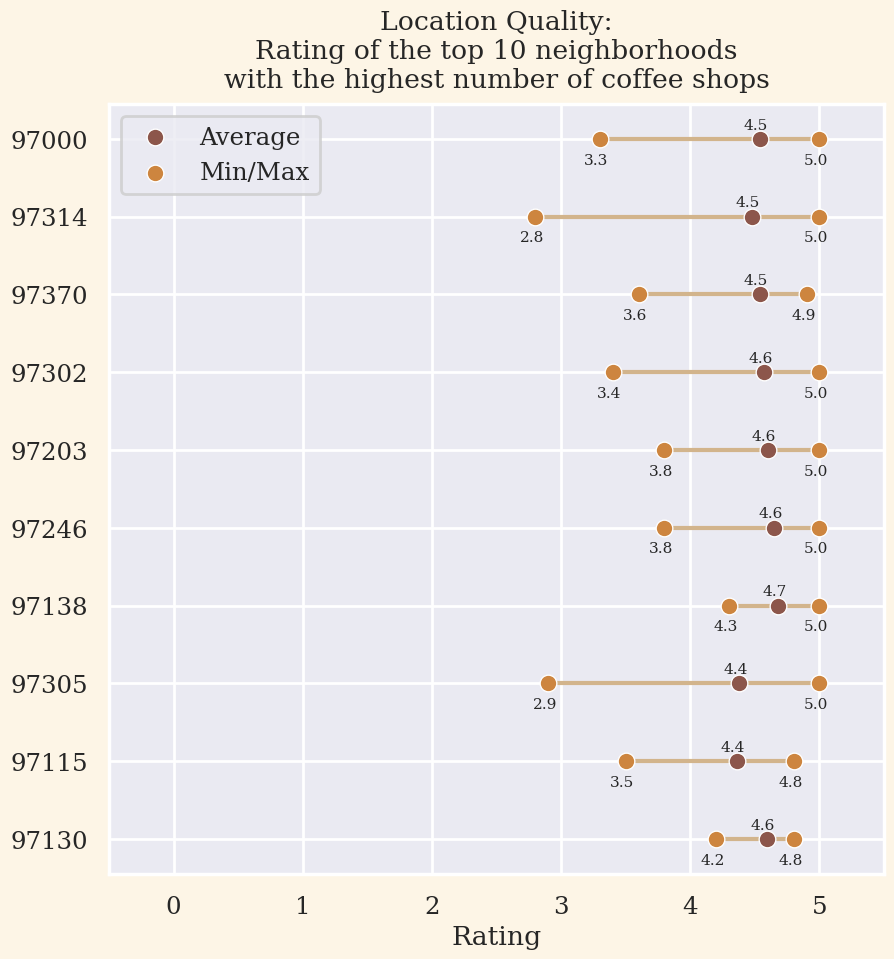

In [1109]:
pc = coffee_shops['postalCode'].value_counts().iloc[:10]
avg_rat = coffee_shops[coffee_shops['userRatingCount'] >= 10].groupby('postalCode')['rating'].mean(numeric_only=True)
min_rat = coffee_shops[coffee_shops['userRatingCount'] >= 10].groupby('postalCode')['rating'].min()
max_rat = coffee_shops[coffee_shops['userRatingCount'] >= 10].groupby('postalCode')['rating'].max()

df = pd.merge(
    left=pd.merge(left=pc, right=avg_rat,on='postalCode'),
    right=pd.merge(left=min_rat, right=max_rat, on='postalCode'),
    on='postalCode'
    )

fig, ax = plt.subplots(figsize=(10,10),facecolor='oldlace')

sns.scatterplot(x=df['rating'], y=df.index, ax=ax, color='tab:brown', label='Average', zorder=3)
sns.scatterplot(x=df['rating_x'], y=df.index, ax=ax, color='peru', zorder=3)
sns.scatterplot(x=df['rating_y'], y=df.index, ax=ax, color='peru', label='Min/Max', zorder=3)
ax.hlines(xmin=df['rating_x'], xmax=df['rating_y'], y=df.index, color='tan')

for i in range(len(df)):
    ax.text(x=df['rating'].iloc[i]-0.125, y=i-0.13, s=str(round(df['rating'].iloc[i],1)), fontsize=11)
    ax.text(x=df['rating_x'].iloc[i]-0.12, y=i+0.32, s=str(round(df['rating_x'].iloc[i],2)), fontsize=11)
    ax.text(x=df['rating_y'].iloc[i]-0.12, y=i+0.32, s=str(round(df['rating_y'].iloc[i],2)), fontsize=11)


ax.set_ylabel('')
ax.set_xlabel('Rating')
ax.set_title('Location Quality:\nRating of the top 10 neighborhoods\nwith the highest number of coffee shops', pad=12 )
ax.set_xlim(-0.5,5.5)

plt.show()

In [1110]:
import branca.colormap as cm

cs_by_pc = coffee_shops.groupby('postalCode')['avgPrice'].mean()

m2 = folium.Map(location=(20.992983019751655, -89.63901255210942), zoom_start=12, min_zoom=12).add_to(folium.Figure(width=700, height=650))

folium.Choropleth(
    geo_data='data/resources/31-Yuc.geojson',
    data=cs_by_pc,
    columns=['postalCode', 'avgPrice'],
    key_on= 'feature.properties.d_codigo',
    bins=[_ for _ in np.arange(0,300,2)],
    fill_color='YlOrBr',
).add_to(m2)

m2

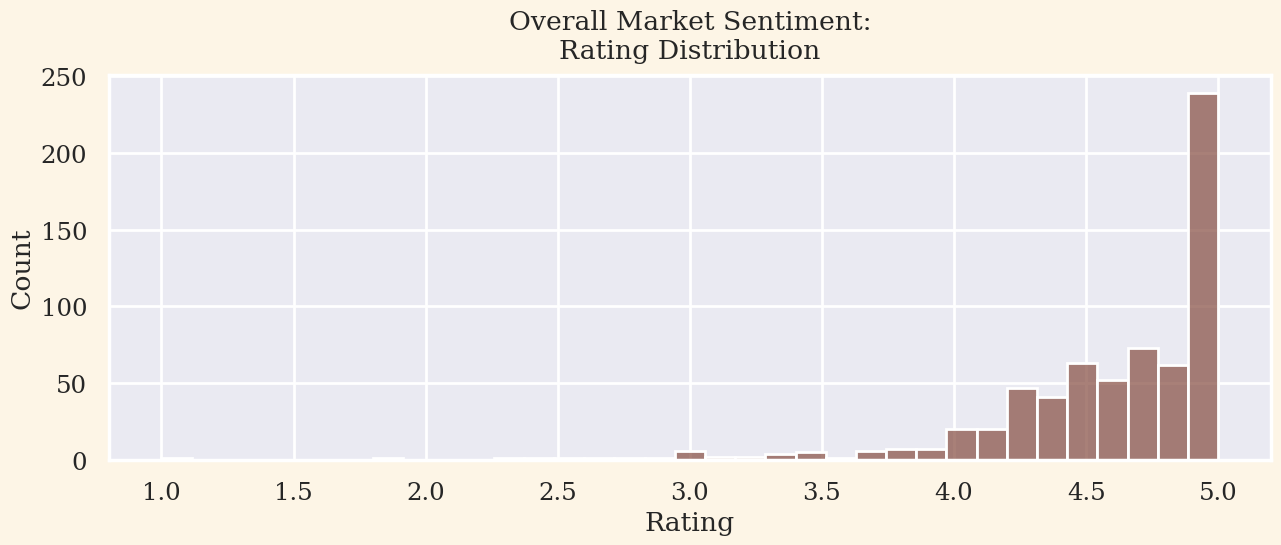

In [1111]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='oldlace')

ax = sns.histplot(data=coffee_shops, x='rating',color='tab:brown', bins=35)
ax.set_title('Overall Market Sentiment:\nRating Distribution', pad=12)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

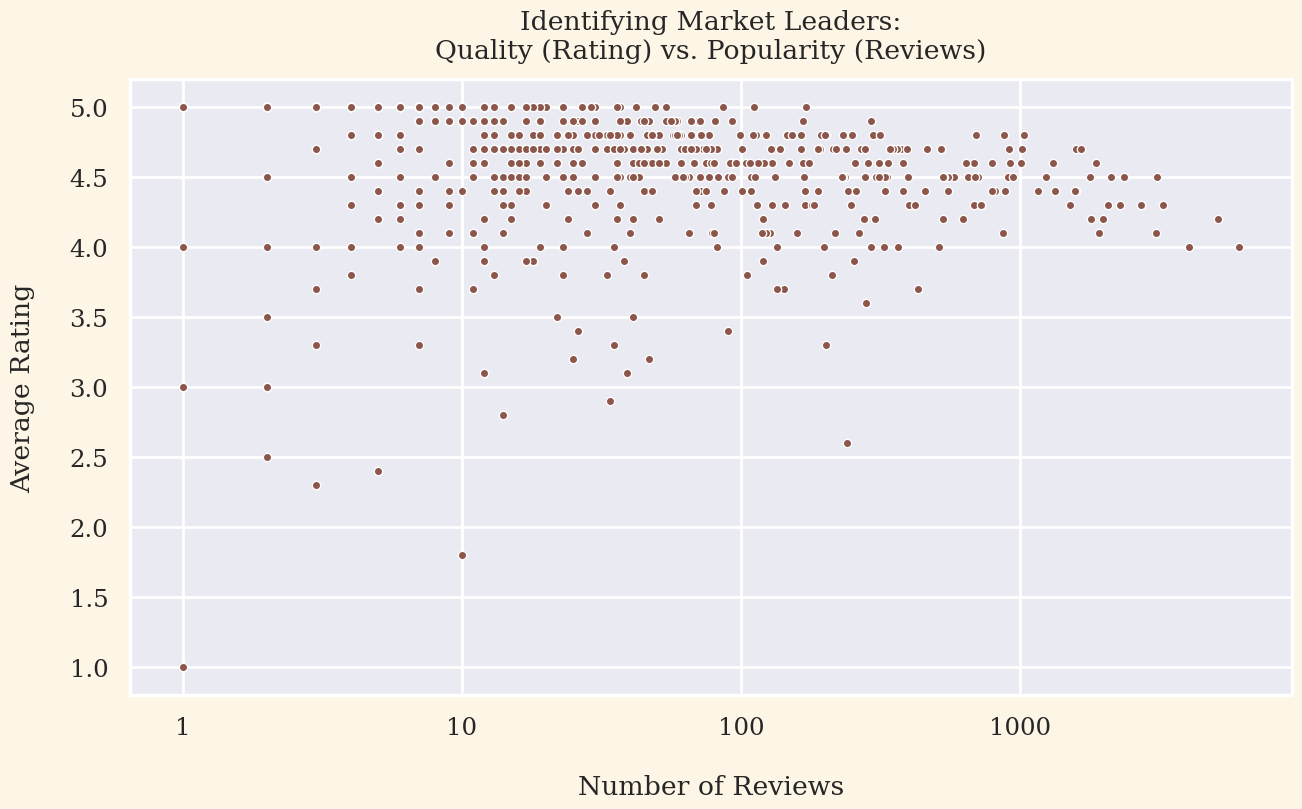

In [1112]:
from matplotlib.ticker import ScalarFormatter

fig,ax = plt.subplots(figsize=(15,8), facecolor='oldlace')
ax = sns.scatterplot(x=coffee_shops['userRatingCount'], y=coffee_shops['rating'], marker='.', color='tab:brown')
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('\nNumber of Reviews')
ax.set_ylabel('Average Rating\n')
ax.set_title('Identifying Market Leaders:\nQuality (Rating) vs. Popularity (Reviews)', pad=15)
plt.show()

In [1113]:

best_coffees = coffee_shops[(coffee_shops['rating'] >= 4.5) & (coffee_shops['userRatingCount'] >= 500)].sort_values(by='rating', ascending=False).iloc[:20]\
    [['displayName', 'rating', 'userRatingCount', 'formattedAddress','websiteUri']]\
    .rename(columns={'displayName':'Name', 'rating':'Rating', 'userRatingCount':'Number of Reviews', 'formattedAddress':'Address','websiteUri':'Website / Social Media'})

best_coffees['Address'] = best_coffees['Address'].apply(lambda s: s.removesuffix(' Mérida, Yuc., Mexico'))

best_coffees['Website / Social Media'] = best_coffees['Website / Social Media'].fillna('#')

best_coffees.style \
    .hide(axis='index') \
    .format(precision=1)

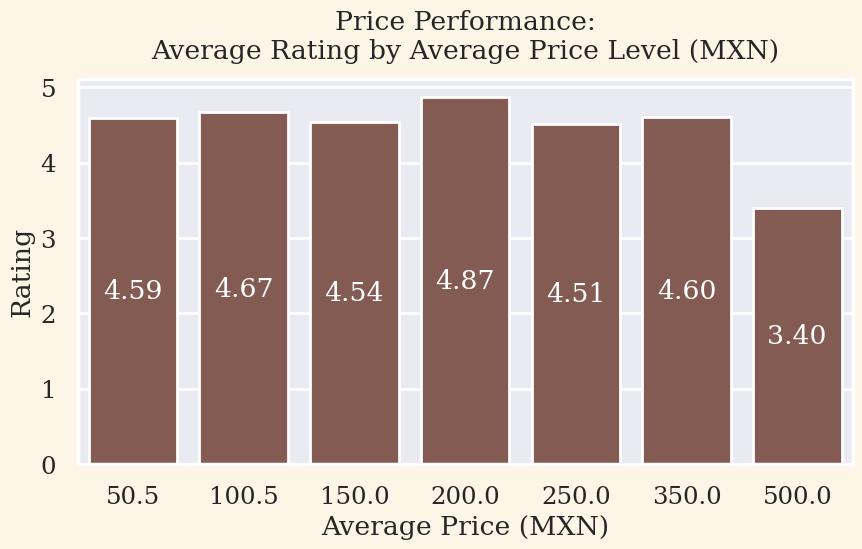

In [1114]:
avgRating_vs_avgPrice = coffee_shops.groupby('avgPrice')['rating'].mean()

fig, ax = plt.subplots(figsize=(10,5), facecolor='oldlace')
ax = sns.barplot(x=avgRating_vs_avgPrice.index, y=avgRating_vs_avgPrice.values, color='tab:brown')
ax.set_xlabel('Average Price (MXN)')
ax.set_ylabel('Rating')
ax.set_title('Price Performance:\nAverage Rating by Average Price Level (MXN)', pad=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white')

plt.show()

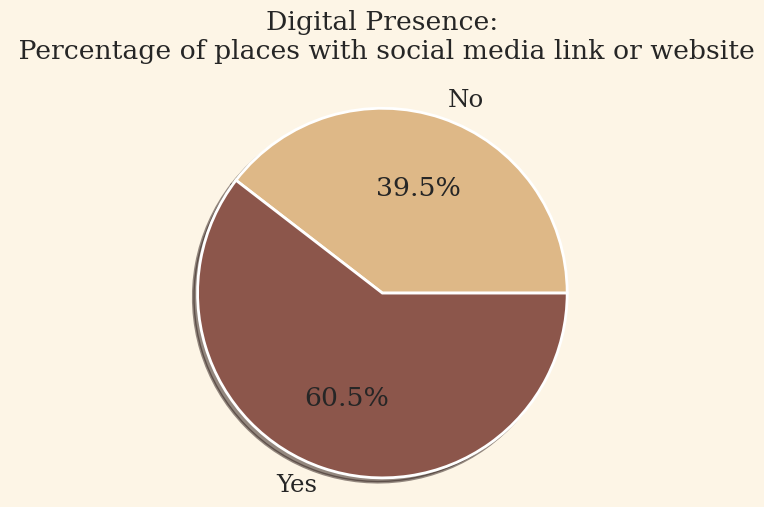

In [1115]:
has_website = len(coffee_shops[coffee_shops['websiteUri'].notnull()])
not_has_website = len(coffee_shops[coffee_shops['websiteUri'].isnull()])

fig,ax = plt.subplots(figsize=(15,5), facecolor='oldlace')
ax.pie([has_website, not_has_website], labels={'Yes', 'No'}, autopct='%1.1f%%', shadow=True, colors=['burlywood','tab:brown'], radius=1.2)
ax.set_title('Digital Presence:\n Percentage of places with social media link or website', pad=30)
plt.show()

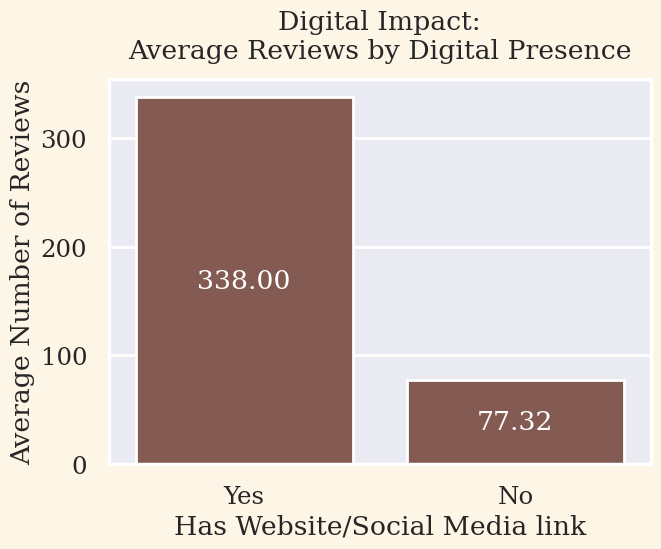

In [1116]:
avgRating_nolink = coffee_shops[coffee_shops['websiteUri'].notnull()]['userRatingCount'].mean()
avgRating_link = coffee_shops[coffee_shops['websiteUri'].isnull()]['userRatingCount'].mean()

fig, ax =plt.subplots(figsize=(7,5), facecolor='oldlace')

ax = sns.barplot(x=['Yes', 'No'], y=[avgRating_nolink, avgRating_link], color='tab:brown')

ax.set_xlabel('Has Website/Social Media link')
ax.set_ylabel('Average Number of Reviews')
ax.set_title('Digital Impact:\nAverage Reviews by Digital Presence', pad=15)

for container in ax.containers:
	ax.bar_label(container, fmt='%.2f', label_type='center', color='white')

plt.show()


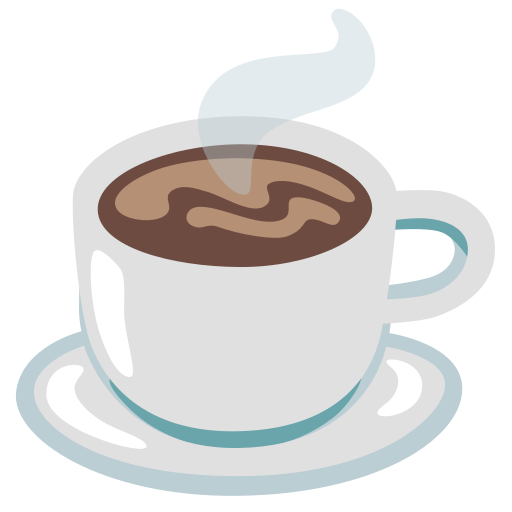

In [1117]:
best_coffees_pos= [(pos['latitude'], pos['longitude']) for pos in coffee_shops.iloc[best_coffees.index]['location']]

m3 = folium.Map(location=(20.992983019751655, -89.63901255210942), zoom_start=12, min_zoom=12).add_to(folium.Figure(width=700, height=650))

icon = folium.CustomIcon(
    icon_image='data/resources/coffee_emoji.png',
    icon_size=(35,35)
)

i = 0

for pos in best_coffees_pos:
    html = f'''
                <div style="font-family: Arial, sans-serif; padding: 5px; border-radius: 5px; background-color: #FDF5E6; max-width: 250px;">
                <h3 style="color: #8c564b; margin-top: 0; margin-bottom: 5px; border-bottom: 2px solid #8c564b; padding-bottom: 3px;">
                    <center>{best_coffees['Name'].iloc[i]}</center>
                </h3>
                <p style="margin: 3px 0; font-size: 1.1em;">
                    ⭐ <b>Rating:</b> <span style="font-weight: bold;">{best_coffees['Rating'].iloc[i]}</span>
                </p>
                <p style="margin: 3px 0; font-size: 1.1em;">
                    📝 <b>Reviews:</b> {best_coffees['Number of Reviews'].iloc[i]}
                </p>
                
                </p>
                <p style="margin: 3px 0; font-size: 1.1em;">
                    🔗 <a href={best_coffees['Website / Social Media'].iloc[i]}>Website / Social Media </a>
                </p>
                
                <hr style="border-top: 1px solid #ccc; margin: 5px 0;">
                <p style="margin: 3px 0; font-size: 0.9em; color: #555;">
                    🏠 <b>Address:</b> {best_coffees['Address'].iloc[i]}
                </p>
                </div>
    '''
    
    folium.Marker(
        location= [pos[0], pos[1]],
        tooltip= f'<b>{best_coffees['Name'].iloc[i]}</b>',
        popup=folium.Popup(html=html, max_width=1000),
        icon=icon
    ).add_to(m3)
    i+=1

m3